## Principal Component Analysis

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_tumor_data_features.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Manual Implementation of PCA

##### Scaling Data

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_X = sc.fit_transform(df)

In [5]:
sc_X.mean()

-6.826538293184326e-17

In [6]:
sc_X -= sc_X.mean(axis=0)

In [7]:
sc_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
#Grab Covariance Matrix
cov_matrix = np.cov(sc_X, rowvar=False)

In [11]:
#Get Eigen Vectors and Eigen Values
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [12]:
# Choose number of components
num_components = 2

In [17]:
#get index sorting key based on Eigen Values

sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [18]:
#Get num_components of Eigen Values and Eigen Vectors

eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:,sorted_key]

In [19]:
eigen_values

array([13.30499079,  5.7013746 ])

In [20]:
eigen_vectors

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [21]:
#dot product of original data and eigen vectors are the principal component values --  projection step

principal_component = np.dot(sc_X,eigen_vectors)
principal_component

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second PCA')

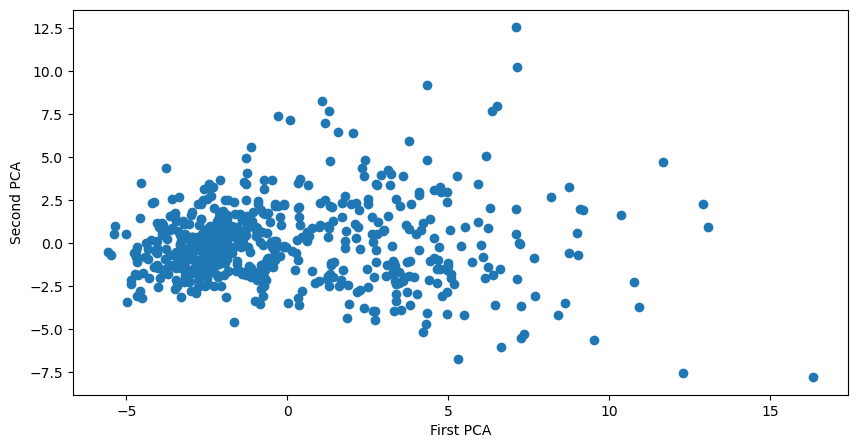

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(principal_component[:,0], principal_component[:,1])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
cancer_df = load_breast_cancer()

In [27]:
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
cancer_df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Text(0, 0.5, 'Second PCA')

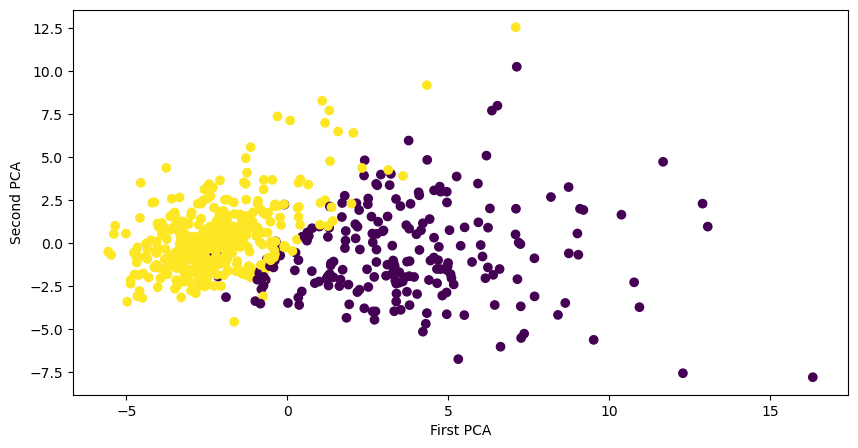

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(principal_component[:,0], principal_component[:,1], c = cancer_df['target'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')